# Import Libraries and load dataset

In [1528]:
import warnings
warnings.filterwarnings('ignore')

In [1529]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

#remove scientific notations and display numbers with 2 decimal points instead
pd.options.display.float_format = '{:,.4f}'.format

In [ ]:
concrete_df = pd.read_csv("concrete.csv")
concrete_df.head()

Since we are looking for the strength that is a continuous value, the prediction would need at least an integer value, therefore we need to round the values to the nearest integer

In [1531]:
concrete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


all continous, age integer

In [1532]:
concrete_df.nunique()

cement          278
slag            185
ash             156
water           195
superplastic    111
coarseagg       284
fineagg         302
age              14
strength        845
dtype: int64

In [1533]:
concrete_df.shape

(1030, 9)

## EDA

### Univariate

In [1534]:
concrete_df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,"1,030.0000",281.1679,104.5064,102.0000,192.3750,272.9000,350.0000,540.0000
slag,"1,030.0000",73.8958,86.2793,0.0000,0.0000,22.0000,142.9500,359.4000
ash,"1,030.0000",54.1883,63.9970,0.0000,0.0000,0.0000,118.3000,200.1000
water,"1,030.0000",181.5673,21.3542,121.8000,164.9000,185.0000,192.0000,247.0000
superplastic,"1,030.0000",6.2047,5.9738,0.0000,0.0000,6.4000,10.2000,32.2000
coarseagg,"1,030.0000",972.9189,77.7540,801.0000,932.0000,968.0000,"1,029.4000","1,145.0000"
fineagg,"1,030.0000",773.5805,80.1760,594.0000,730.9500,779.5000,824.0000,992.6000
age,"1,030.0000",45.6621,63.1699,1.0000,7.0000,28.0000,56.0000,365.0000
strength,"1,030.0000",35.8180,16.7057,2.3300,23.7100,34.4450,46.1350,82.6000


The data seem to be good quality, no extreme values. We will check the outliers.

In [1535]:
concrete_df.skew()

cement          0.5095
slag            0.8007
ash             0.5374
water           0.0746
superplastic    0.9072
coarseagg      -0.0402
fineagg        -0.2530
age             3.2692
strength        0.4170
dtype: float64

Only Age seems to be heavily skewed

In [1536]:
# Check forduplicates across all fields

column_list = ['cement','slag','ash','water','superplastic','coarseagg','fineagg','age','strength']
dupes = concrete_df[concrete_df.duplicated(subset=column_list, keep=False)]
print (len(dupes))

36


In [1537]:
# Found 36 of them
dupes

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
27,425.0000,106.3000,0.0000,153.5000,16.5000,852.1000,887.1000,91,65.2000
49,425.0000,106.3000,0.0000,153.5000,16.5000,852.1000,887.1000,3,33.4000
88,362.6000,189.0000,0.0000,164.9000,11.6000,944.7000,755.8000,3,35.3000
91,362.6000,189.0000,0.0000,164.9000,11.6000,944.7000,755.8000,7,55.9000
96,362.6000,189.0000,0.0000,164.9000,11.6000,944.7000,755.8000,28,71.3000
190,362.6000,189.0000,0.0000,164.9000,11.6000,944.7000,755.8000,56,77.3000
245,362.6000,189.0000,0.0000,164.9000,11.6000,944.7000,755.8000,91,79.3000
278,425.0000,106.3000,0.0000,153.5000,16.5000,852.1000,887.1000,3,33.4000
298,425.0000,106.3000,0.0000,153.5000,16.5000,852.1000,887.1000,3,33.4000
333,252.0000,0.0000,0.0000,185.0000,0.0000,"1,111.0000",784.0000,28,19.6900


In [1538]:
# Let's keep the unique values only
concrete_df = concrete_df.drop_duplicates()
concrete_df.shape

(1005, 9)

In [1539]:
concrete_df.isna().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

no missing values

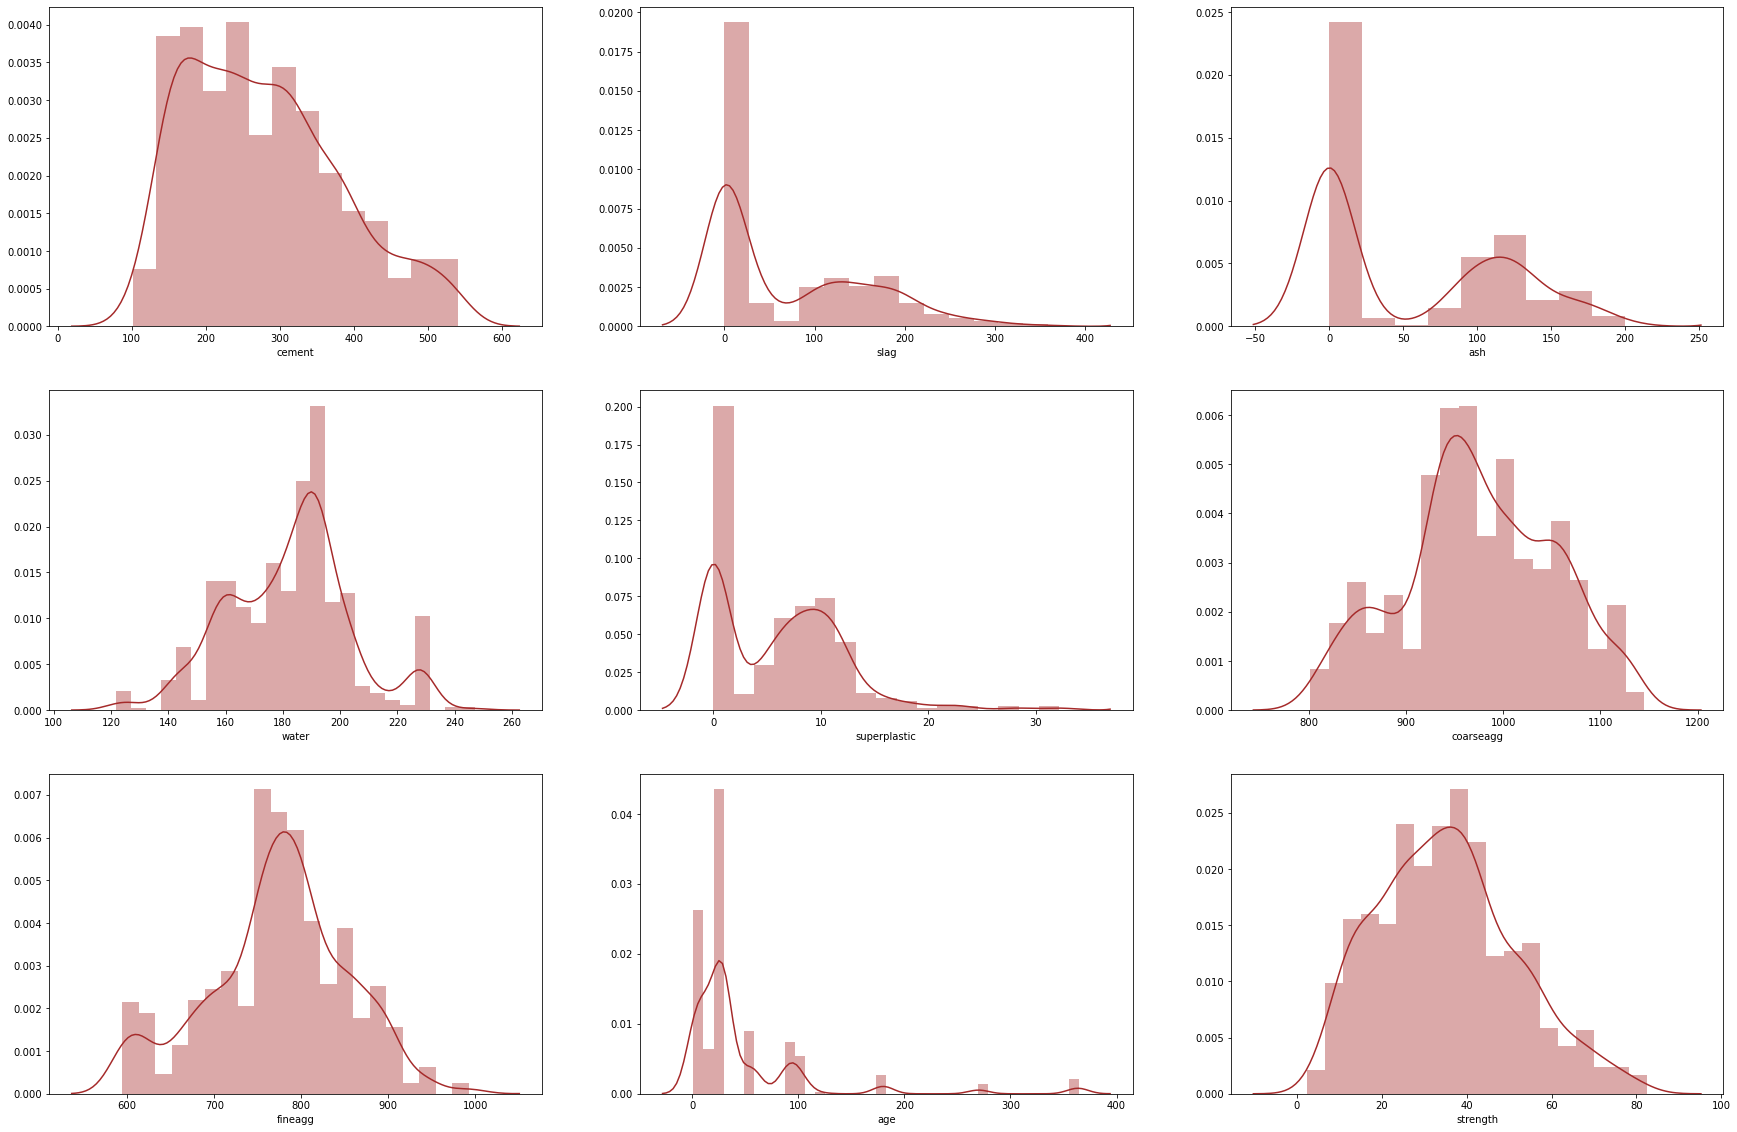

In [1540]:
plt.figure(figsize= (30,20)) # setting the figure size
pos = 1
for i in concrete_df.columns:
    plt.subplot(3, 3, pos)
    sns.distplot(concrete_df[i], kde = True, color = 'brown')
#     plt.legend().remove()  # Remove legend to make the entire plot look 'good'
    pos += 1  # to plot over the grid one by one 

* cement: looks well balanced data, no odd values, slightly positively skewed
* slag, ash, superplastic: looks well balanced data, no odd values, lots of zeros. But zeros here mean they were not used. If they have low correlation maybe we can create a boolean variable from them
* water, courseagg, fineagg: similar trends

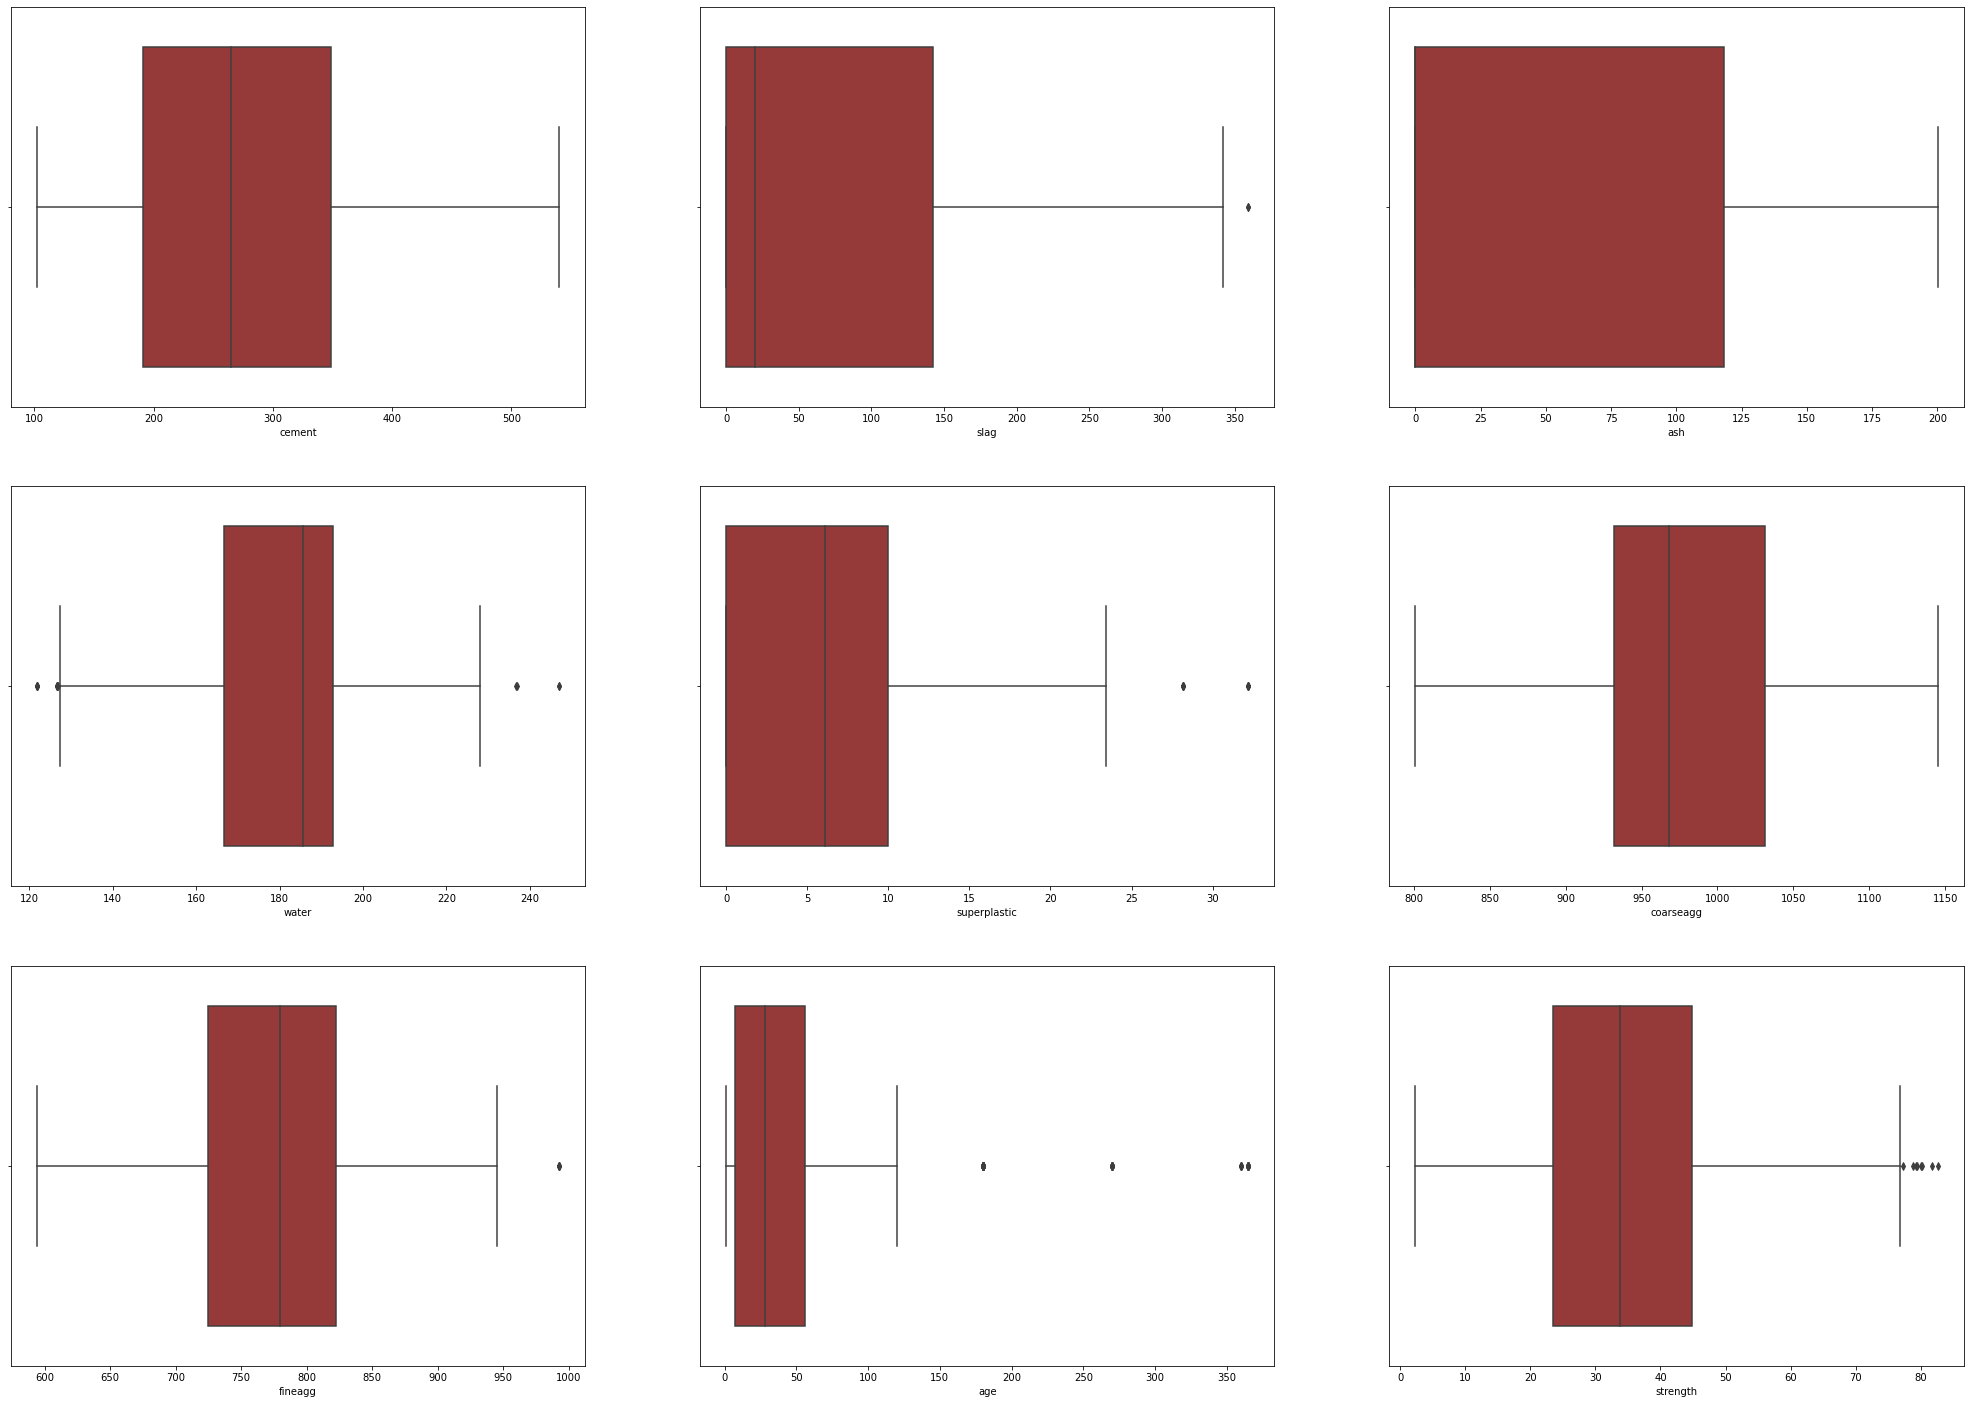

In [1541]:
# Outliers can be found in these colunns:

plt.figure(figsize= (35,25)) # setting the figure size
pos = 1
for i in concrete_df.columns:
    plt.subplot(3, 3, pos)
    sns.boxplot(concrete_df[i], color = 'brown')
#     plt.legend().remove()  # Remove legend to make the entire plot look 'good'
    pos += 1  # to plot over the grid one by one 

### Bivariate

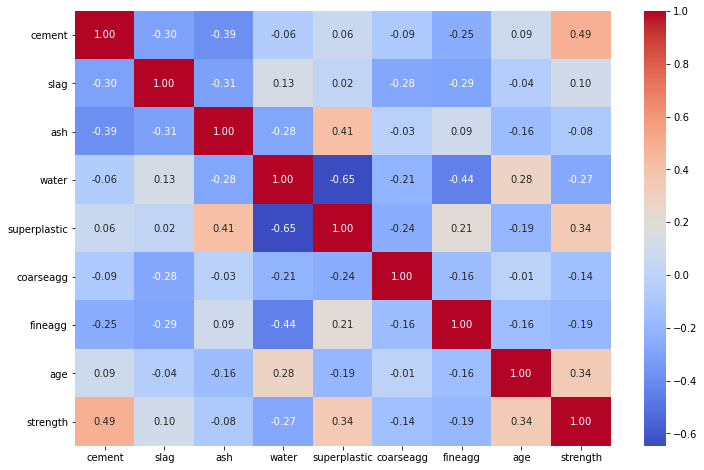

In [1542]:
# heatmap

plt.figure(figsize=(12,8))
sns.heatmap(concrete_df.corr(),annot=True,fmt='.2f',cmap='coolwarm' )
plt.show()

We can see some high correlations between superplastic and water or fineagg and water, ash and cement, etc.

For strength, we see stronger relationshipes for some features than others, e.g. cement, water, superplastic and age.

We could check if the ratio of any of these, or the sum of any of these can be used as an extra feature. That means even taking 2 or more columns, e.g. cement+water+superplastic, or water/age and maybe experiment with that and use it for our model

<Figure size 2880x2880 with 0 Axes>

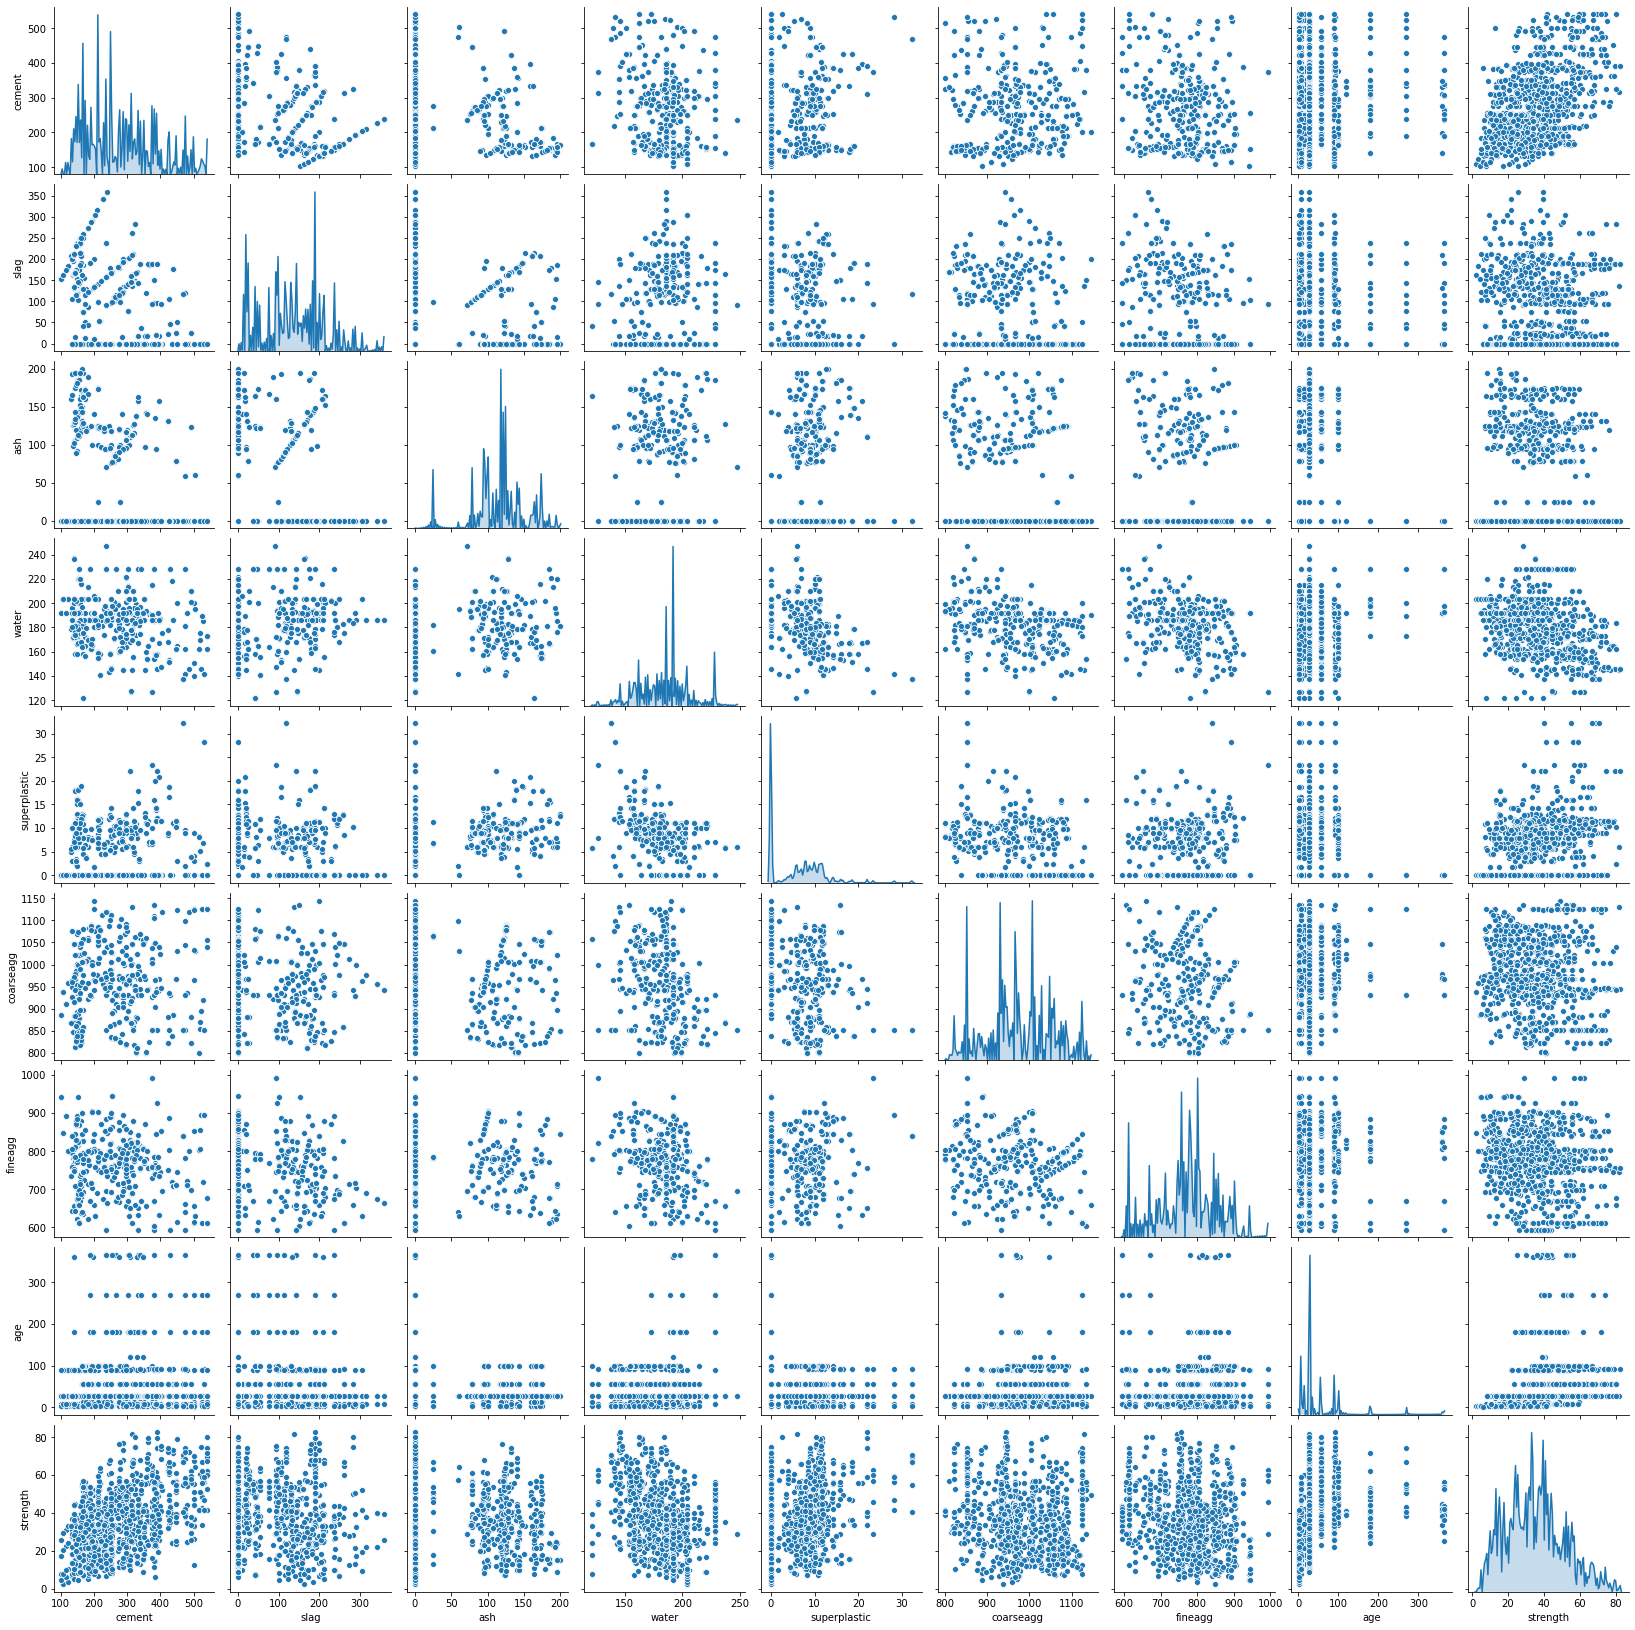

In [1543]:
# pairplot
plt.figure(figsize=(40,40))
sns.pairplot(concrete_df, diag_kind = 'kde', diag_kws={'bw': 0.2});
plt.show()

## Resolving skewness and reducig target variable granularity

0.23815372610933813  after correction


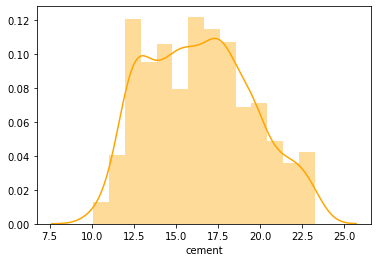

In [1544]:
# let's resolve the skewness of 'cement'

concrete_df['cement'] = (concrete_df['cement'])**(1/2)
sns.distplot(concrete_df['cement'], kde = True, color = 'orange')
print(concrete_df['cement'].skew()," after correction")

In [1545]:
# let's check the outliers in age

print(concrete_df.groupby(concrete_df['age']).agg({'strength': 'count'}))
print(concrete_df.groupby(concrete_df['age']).agg({'strength': 'mean'}))

     strength
age          
1           2
3         129
7         122
14         62
28        419
56         86
90         54
91         17
100        52
120         3
180        26
270        13
360         6
365        14
     strength
age          
1      9.4550
3     18.3781
7     25.1820
14    28.7510
28    36.4296
56    50.7152
90    40.4804
91    68.6759
100   47.6688
120   39.6467
180   41.7304
270   51.2723
360   40.6967
365   43.5579


We can see that the strength does not change significantly after the 120th day which are also the outliers

In [1546]:
# let's remove the outlier age rows which is only a small percentage of the data << it did not help

# high_age = concrete_df[concrete_df['age'] > 120]
# concrete_df.drop(high_age.index, inplace = True)
# print(concrete_df.groupby(concrete_df['age']).agg({'strength': 'count'}))

In [1547]:
concrete_df.shape

(1005, 9)

In [1548]:
# binning data with pd.cut >> for now let's create 10 bins, increasing strength from 1-10 >> it actually gives worse results

# concrete_df['strength'] = pd.cut(concrete_df['strength'], 10, right=True, labels=[1,2,3,4,5,6,7,8,9,10], 
#                                  retbins=False, precision=3, include_lowest=False, duplicates='raise')
# concrete_df['strength'] = concrete_df['strength'].astype('int')

# print(concrete_df.groupby(concrete_df['strength']).agg({'strength': 'count'}))

In [1549]:
concrete_df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

## Feature Extraction 
#### creating combinations of features

In [1550]:
concrete_df.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

In [1551]:
# additional fields made from the 

concrete_df['cement/water'] = concrete_df['cement'] * concrete_df['water']
concrete_df['water/superplastic'] = concrete_df['water'] * concrete_df['superplastic']
concrete_df['water/coarseagg'] = concrete_df['water'] * concrete_df['coarseagg']
concrete_df['cement+water+ash'] = concrete_df['cement'] + concrete_df['water'] + concrete_df['ash']
concrete_df['cement+water'] = concrete_df['cement'] + concrete_df['water']

# now let's create some fields from the low correlation fields and tie them with another field that it has low correlation with
concrete_df['age/coarseagg'] = concrete_df['age'] * concrete_df['coarseagg']
concrete_df['ash/fineeagg'] = concrete_df['ash'] * concrete_df['fineagg']
concrete_df['cement/coarseagg'] = concrete_df['cement'] * concrete_df['coarseagg']
concrete_df['cement/age'] = concrete_df['cement'] * concrete_df['age']
concrete_df['slag/age'] = concrete_df['slag'] * concrete_df['age']

We could even create a combination from 3 fields but for our results this is sufficient, as we will see

In [1552]:
concrete_df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,cement/water,water/superplastic,water/coarseagg,cement+water+ash,cement+water,age/coarseagg,ash/fineeagg,cement/coarseagg,cement/age,slag/age
0,11.8870,212.0000,0.0000,203.5000,0.0000,971.8000,748.5000,28,29.8900,"2,418.9979",0.0000,"197,761.3000",215.3870,215.3870,"27,210.4000",0.0000,"11,551.7552",332.8351,"5,936.0000"
1,12.9962,42.2000,124.3000,158.3000,10.8000,"1,080.8000",796.2000,14,23.5100,"2,057.2911","1,709.6400","171,090.6400",295.5962,171.2962,"15,131.2000","98,967.6600","14,046.2425",181.9461,590.8000
2,15.8114,0.0000,95.7000,187.4000,5.5000,956.9000,861.2000,28,29.2200,"2,963.0542","1,030.7000","179,323.0600",298.9114,203.2114,"26,793.2000","82,416.8400","15,129.9175",442.7189,0.0000
3,16.3095,114.0000,0.0000,228.0000,0.0000,932.0000,670.0000,28,45.8500,"3,718.5675",0.0000,"212,496.0000",244.3095,244.3095,"26,096.0000",0.0000,"15,200.4600",456.6662,"3,192.0000"
4,12.4419,183.4000,0.0000,193.3000,9.1000,"1,047.4000",696.7000,28,18.2900,"2,405.0125","1,759.0300","202,462.4200",205.7419,205.7419,"29,327.2000",0.0000,"13,031.6092",348.3722,"5,135.2000"


In [1553]:
columns = concrete_df.columns.to_list()
columns

['cement',
 'slag',
 'ash',
 'water',
 'superplastic',
 'coarseagg',
 'fineagg',
 'age',
 'strength',
 'cement/water',
 'water/superplastic',
 'water/coarseagg',
 'cement+water+ash',
 'cement+water',
 'age/coarseagg',
 'ash/fineeagg',
 'cement/coarseagg',
 'cement/age',
 'slag/age']

## Normalisation

In [1554]:
columns = concrete_df.columns.to_list()
scaler = MinMaxScaler()
concrete_df = pd.DataFrame(scaler.fit_transform(concrete_df))
concrete_df.columns = columns



# have to convert 'strength' into integer otherwise the models would not work
concrete_df['strength'] = round(concrete_df['strength'])
concrete_df['strength'].astype('int')
concrete_df.head(10)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,cement/water,water/superplastic,water/coarseagg,cement+water+ash,cement+water,age/coarseagg,ash/fineeagg,cement/coarseagg,cement/age,slag/age
0,0.1360,0.5899,0.0000,0.6526,0.0000,0.4965,0.3876,0.0742,0.0000,0.2478,0.0000,0.7674,0.2499,0.6317,0.0698,0.0000,0.1509,0.0395,0.0685
1,0.2205,0.1174,0.6212,0.2915,0.3354,0.8134,0.5073,0.0357,0.0000,0.1412,0.3853,0.5397,0.5335,0.2862,0.0377,0.5846,0.2961,0.0205,0.0068
2,0.4347,0.0000,0.4783,0.5240,0.1708,0.4532,0.6703,0.0742,0.0000,0.4083,0.2323,0.6100,0.5452,0.5363,0.0687,0.4869,0.3591,0.0533,0.0000
3,0.4727,0.3172,0.0000,0.8482,0.0000,0.3808,0.1907,0.0742,1.0000,0.6311,0.0000,0.8932,0.3522,0.8583,0.0668,0.0000,0.3632,0.0551,0.0368
4,0.1783,0.5103,0.0000,0.5711,0.2826,0.7163,0.2577,0.0742,0.0000,0.2437,0.3964,0.8076,0.2158,0.5561,0.0754,0.0000,0.2370,0.0414,0.0592
5,0.4467,0.0000,0.0000,0.5607,0.0000,0.2581,0.8806,0.2445,0.0000,0.4387,0.0000,0.5376,0.2237,0.5736,0.2104,0.0000,0.3056,0.1786,0.0000
6,0.2143,0.6962,0.0000,0.6526,0.0000,0.5076,0.2474,0.0165,0.0000,0.3096,0.0000,0.7740,0.2535,0.6398,0.0156,0.0000,0.2119,0.0089,0.0202
7,0.4381,0.0000,0.5912,0.5327,0.1988,0.6610,0.4107,0.1511,0.0000,0.4159,0.2719,0.7341,0.6291,0.5453,0.1506,0.5295,0.4276,0.1094,0.0000
8,0.5408,0.0000,0.0000,0.5607,0.0000,0.8256,0.4290,0.0742,0.0000,0.5087,0.0000,0.8576,0.2281,0.5833,0.0782,0.0000,0.5650,0.0582,0.0000
9,0.1789,0.5120,0.7146,0.5767,0.2795,0.2297,0.2634,0.0742,0.0000,0.2467,0.3935,0.5366,0.7238,0.5617,0.0630,0.5905,0.1162,0.0415,0.0594


## Splitting the data

In [1555]:
# Separate independent and dependent variables

X = concrete_df.drop('strength', axis = 1)
y = concrete_df['strength']

X = pd.get_dummies(X, drop_first = True)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

X_train.head().sort_index()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,cement/water,water/superplastic,water/coarseagg,cement+water+ash,cement+water,age/coarseagg,ash/fineeagg,cement/coarseagg,cement/age,slag/age
439,0.2813,0.0000,0.6257,0.3578,0.3075,0.8081,0.5140,0.1511,0.2122,0.3717,0.6138,0.5688,0.3575,0.1582,0.5909,0.3449,0.0949,0.0000
675,0.2933,0.0000,0.5022,0.3498,0.2329,0.5971,0.7825,0.1511,0.2159,0.2799,0.5019,0.4785,0.3509,0.1473,0.5378,0.2959,0.0960,0.0000
742,0.2933,0.0000,0.5022,0.3866,0.2329,0.5727,0.7722,0.1511,0.2348,0.2877,0.5292,0.4948,0.3870,0.1461,0.5354,0.2891,0.0960,0.0000
809,0.1309,0.4560,0.6382,0.9177,0.1801,0.1965,0.1545,0.0742,0.3595,0.3094,0.8343,0.8185,0.8913,0.0621,0.4946,0.0761,0.0392,0.0529
997,0.1472,0.0000,0.6677,0.4712,0.3447,0.5189,0.5457,0.0742,0.1761,0.4523,0.5910,0.6425,0.4550,0.0704,0.6404,0.1646,0.0400,0.0000


In [1556]:
# check split of data

print("{0:0.2f}% data is in training set".format((len(X_train)/len(concrete_df.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(concrete_df.index)) * 100))

69.95% data is in training set
30.05% data is in test set


## Model building

In [1559]:
# Blank lists to store model name, training score, testing score, recall, precision, and roc

algo = []
tr = [] # training score
te = [] # testing score
ac = [] # accuracy

In [1560]:
# Linear regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score

LinR_model = LinearRegression()
LinR_model.fit(X_train, y_train)

algo.append('Linear Regression')
tr.append(LinR_model.score(X_train, y_train))
te.append(LinR_model.score(X_test, y_test))

In [1561]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier

DT_model = DecisionTreeClassifier(random_state = 1)
DT_model.fit(X_train, y_train)

algo.append('Decision Tree')
tr.append(DT_model.score(X_train, y_train))
te.append(DT_model.score(X_test, y_test))

In [1562]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression

LogR_model = LogisticRegression( random_state = 1)

LogR_model.fit(X_train, y_train)

algo.append('Logistic Regression')
tr.append(LogR_model.score(X_train, y_train))
te.append(LogR_model.score(X_test, y_test))

In [1563]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(random_state = 1, n_estimators = 50)

RF_model.fit(X_train, y_train)

algo.append('Random Forest')
tr.append(RF_model.score(X_train, y_train))
te.append(RF_model.score(X_test, y_test))

In [1564]:
# Bagging

from sklearn.ensemble import BaggingClassifier

bag_model = BaggingClassifier(n_estimators=100, max_samples= .7, bootstrap=True, oob_score=True, random_state=22)

bag_model.fit(X_train, y_train)

algo.append('Bagging')
tr.append(bag_model.score(X_train, y_train))
te.append(bag_model.score(X_test, y_test))

In [1565]:
# AdaBoost

from sklearn.ensemble import AdaBoostClassifier

ada_model = AdaBoostClassifier(n_estimators = 400, learning_rate = 0.1, random_state= 22)

ada_model.fit(X_train, y_train)

algo.append('Adaboost')
tr.append(ada_model.score(X_train, y_train))
te.append(ada_model.score(X_test, y_test))

In [1566]:
# Gradientboost

from sklearn.ensemble import GradientBoostingClassifier

grad_model = GradientBoostingClassifier(n_estimators = 600, learning_rate = 0.1, random_state=22)

grad_model.fit(X_train, y_train)

algo.append('GradientBoost')
tr.append(grad_model.score(X_train, y_train))
te.append(grad_model.score(X_test, y_test))

In [1567]:
# XGboost

from xgboost import XGBClassifier

XGB_model = XGBClassifier(n_estimators = 600, learning_rate = 0.1, random_state=22)

XGB_model.fit(X_train, y_train)

algo.append('XGBoost')
tr.append(XGB_model.score(X_train, y_train))
te.append(XGB_model.score(X_test, y_test))

In [1568]:
# DataFrame to compare the results

results = pd.DataFrame()
results['Model'] = algo
results['Training Score'] = tr
results['Testing Score'] = te

results = results.set_index('Model')
results

,Training Score,Testing Score
Model,,
Linear Regression,0.3934,0.3112
Decision Tree,0.9972,0.9172
Logistic Regression,0.8023,0.8079
Random Forest,0.9972,0.9305
Bagging,0.9900,0.9305
Adaboost,0.9445,0.9305
GradientBoost,0.9972,0.9338
XGBoost,0.9972,0.9272


Linear regression is clearly not a good model, so is logistic regression, but RF, Bagging and XGBoost are the best candidates with high Testing score.

## Feature Importances

In [1569]:
# Let's create a dataframe for the models and a list of the columns by index

feature_importance = pd.DataFrame()
feature_importance['Columns'] = X_train.columns
feature_importance['DT'] = DT_model.feature_importances_
feature_importance['RF'] = RF_model.feature_importances_
# feature_importance['Bagging'] = bag_model.feature_importances_ >> this would not work
feature_importance['AdaBoost'] = ada_model.feature_importances_
feature_importance['GradientBoost'] = grad_model.feature_importances_
feature_importance['XGBoost'] = XGB_model.feature_importances_
feature_importance

,Columns,DT,RF,AdaBoost,GradientBoost,XGBoost
0,cement,0.0504,0.0760,0.1075,0.0700,0.0576
1,slag,0.0334,0.0343,0.0200,0.0443,0.0876
2,ash,0.0000,0.0122,0.0025,0.0079,0.0651
3,water,0.1339,0.0667,0.1225,0.0877,0.0816
4,superplastic,0.0253,0.0322,0.0050,0.0176,0.0442
5,coarseagg,0.0250,0.0292,0.0625,0.0142,0.0309
6,fineagg,0.1177,0.0514,0.1525,0.0980,0.0696
7,age,0.0033,0.0564,0.0000,0.0030,0.0416
8,cement/water,0.0223,0.0534,0.0375,0.0369,0.0410
9,water/superplastic,0.0000,0.0309,0.0725,0.0197,0.0384


In [1570]:
# Let's highlight less important columns that we may be able to drop

feat = feature_importance[['DT','RF', 'AdaBoost', 'GradientBoost','XGBoost']].style.applymap(lambda x: 'background-color : pink' if x<0.02 else '') 
feat

,DT,RF,AdaBoost,GradientBoost,XGBoost
0,0.050367,0.075964,0.107500,0.069964,0.057639
1,0.033430,0.034326,0.020000,0.044297,0.087594
2,0.000000,0.012221,0.002500,0.007884,0.065141
3,0.133907,0.066687,0.122500,0.087663,0.081642
4,0.025282,0.032235,0.005000,0.017613,0.044232
5,0.024963,0.029162,0.062500,0.014197,0.030943
6,0.117711,0.051376,0.152500,0.098016,0.069626
7,0.003322,0.056410,0.000000,0.003022,0.041609
8,0.022308,0.053400,0.037500,0.036902,0.040982
9,0.000000,0.030868,0.072500,0.019743,0.038361


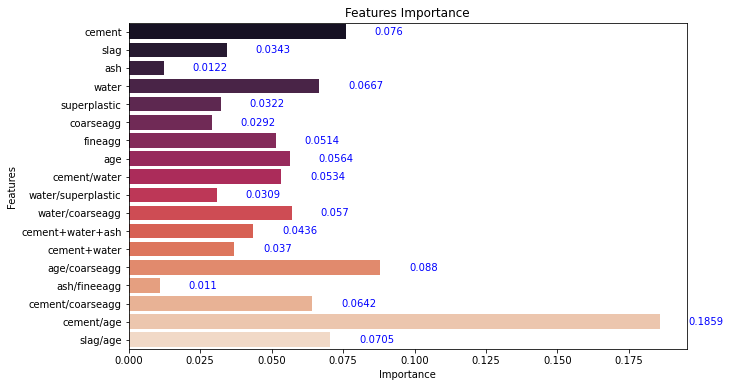

In [1571]:
# let's plot Random Forest

plt.figure(figsize=(10,6))
plt.title('Features Importance')

features_importance_plot = pd.concat([pd.DataFrame(concrete_df.drop('strength', axis = 1).columns), 
                                pd.DataFrame(RF_model.feature_importances_)], axis = 1)



sns.barplot(x = features_importance_plot.iloc[:, 1], y = features_importance_plot.iloc[:, 0], palette = 'rocket')

plt.xlabel('Importance')
plt.ylabel('Features')

#create  list for the values from the numbers
L = features_importance_plot.iloc[:, 1].to_list()
#create the iteration for the numbers
for i, v in enumerate(L):
    plt.text(x = v + 0.01, y = i + 0.15, s = round(v, 4), color='blue')

looks like we created some highly important columns, especially the cement/age combination. It also has high importance across the table above

## K-fold cross validation on all models

In [1572]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

models = [LinR_model, LogR_model, DT_model,RF_model, ada_model, grad_model, XGB_model, bag_model]
num_folds = 10
seed = 7
kfold = KFold(n_splits=num_folds, random_state=seed)

for i in models:
    cv_score = cross_val_score(i, X, y, cv=kfold)
    cv_mean = np.mean(abs(cv_score))
    cv_std = cv_score.std()
    print(i,f' K-fold cv score mean: {cv_mean:.4f} with std: {cv_std:.4f}')
    print(" ")

LinearRegression()  K-fold cv score mean: 0.3348 with std: 0.1091
 
LogisticRegression(random_state=1)  K-fold cv score mean: 0.8000 with std: 0.0462
 
DecisionTreeClassifier(random_state=1)  K-fold cv score mean: 0.9065 with std: 0.0297
 
RandomForestClassifier(n_estimators=50, random_state=1)  K-fold cv score mean: 0.9294 with std: 0.0200
 
AdaBoostClassifier(learning_rate=0.1, n_estimators=400, random_state=22)  K-fold cv score mean: 0.9075 with std: 0.0262
 
GradientBoostingClassifier(n_estimators=600, random_state=22)  K-fold cv score mean: 0.9254 with std: 0.0208
 
XGBClassifier(n_estimators=600, random_state=22)  K-fold cv score mean: 0.9244 with std: 0.0225
 
BaggingClassifier(max_samples=0.7, n_estimators=100, oob_score=True,
                  random_state=22)  K-fold cv score mean: 0.9194 with std: 0.0185
 


It gives us very similar results to what we see above in the table

## Parameter Tuning with GridSearch and RandomizedSearch

#### GradientBoost

In [1573]:
grad_model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 600,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': 22,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [1574]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators':[10, 50, 100],'learning_rate': [0.01, 0.1, 1, 10, 100,200], 
              'min_samples_leaf': [0.1,1,2], 'criterion':['friedman_mse', 'mse', 'mae']} 

grad_grid = GridSearchCV(grad_model, param_grid = param_grid, cv = 10) 

grad_grid.fit(X_train, y_train) 

print("Best cross-validation accuracy: {:.2f}". format(grad_grid.best_score_)) 
print("Best parameters: ", grad_grid.best_params_) 
print("Test set accuracy: {:.2f}". format(grad_grid.score(X_test, y_test)))

Best cross-validation accuracy: 0.91
Best parameters:  {'criterion': 'mse', 'learning_rate': 0.1, 'min_samples_leaf': 2, 'n_estimators': 100}
Test set accuracy: 0.93


In [1575]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'n_estimators':[10, 50, 100],'learning_rate': [0.001, 0.01, 0.1, 1, 10, 100], 
              'min_samples_leaf': [1,2,3], 'criterion':['friedman_mse', 'mse', 'mae']} 

# run randomized search
samples = 10  # number of random samples 
grad_randomCV = RandomizedSearchCV(grad_model, param_distributions=param_grid, n_iter=samples) #default cv = 3

grad_randomCV.fit(X, y)

print(grad_randomCV.best_params_)

print("Best cross-validation accuracy: {:.2f}". format(grad_randomCV.best_score_)) 
print("Best parameters: ", grad_randomCV.best_params_) 
print("Test set accuracy: {:.2f}". format(grad_randomCV.score( X_test, y_test)))

{'n_estimators': 100, 'min_samples_leaf': 1, 'learning_rate': 1, 'criterion': 'friedman_mse'}
Best cross-validation accuracy: 0.91
Best parameters:  {'n_estimators': 100, 'min_samples_leaf': 1, 'learning_rate': 1, 'criterion': 'friedman_mse'}
Test set accuracy: 1.00


#### Bagging

In [1576]:
bag_model.get_params()

{'base_estimator': None,
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 0.7,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': True,
 'random_state': 22,
 'verbose': 0,
 'warm_start': False}

In [1577]:
param_grid = {'n_estimators':[50, 100,200],'max_samples': [0.001, 0.01, 0.1, 1, 10, 100], 
              'max_features': [1,2,3]} 

bag_grid = GridSearchCV(bag_model, param_grid = param_grid, cv = 10) 

bag_grid.fit(X_train, y_train)

print("Best cross-validation accuracy: {:.2f}". format(bag_grid.best_score_)) 
print("Best parameters: ", bag_grid.best_params_) 
print("Test set accuracy: {:.2f}". format(bag_grid.score(X_test, y_test)))

Best cross-validation accuracy: 0.84
Best parameters:  {'max_features': 3, 'max_samples': 100, 'n_estimators': 100}
Test set accuracy: 0.88


In [1578]:
param_grid = {'n_estimators':[50, 100,200],'max_samples': [0.001, 0.01, 0.1, 1, 10, 100], 
              'max_features': [1,2,3]} 

# run randomized search
samples = 10  # number of random samples 
bag_randomCV = RandomizedSearchCV(bag_model, param_distributions=param_grid, n_iter=samples) #default cv = 3

bag_randomCV.fit(X, y)

print(bag_randomCV.best_params_)

print("Best cross-validation accuracy: {:.2f}". format(bag_randomCV.best_score_)) 
print("Best parameters: ", bag_randomCV.best_params_) 
print("Test set accuracy: {:.2f}". format(bag_randomCV.score( X_test, y_test)))

{'n_estimators': 200, 'max_samples': 0.1, 'max_features': 3}
Best cross-validation accuracy: 0.83
Best parameters:  {'n_estimators': 200, 'max_samples': 0.1, 'max_features': 3}
Test set accuracy: 0.90


#### XGBoost

In [1579]:
XGB_model.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 600,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 22,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [1580]:
param_grid = {'n_estimators':[50, 100,200],'learning_rate': [0.001, 0.01, 0.1, 1, 10, 100], 
              'max_features': [1,2,3], 'max_samples': [0.01, 0.1, 1, 10] } 

XGB_grid = GridSearchCV(XGB_model, param_grid = param_grid, cv = 10) 

XGB_grid.fit(X_train, y_train)

print("Best cross-validation accuracy: {:.2f}". format(XGB_grid.best_score_)) 
print("Best parameters: ", XGB_grid.best_params_) 
print("Test set accuracy: {:.2f}". format(XGB_grid.score(X_test, y_test)))

Best cross-validation accuracy: 0.91
Best parameters:  {'learning_rate': 0.1, 'max_features': 1, 'max_samples': 0.01, 'n_estimators': 200}
Test set accuracy: 0.94


In [1581]:
param_grid = {'n_estimators':[50, 100,200],'learning_rate': [0.001, 0.01, 0.1, 1, 10, 100], 
              'max_features': [1,2,3], 'max_samples': [0.01, 0.1, 1, 10]} 

# run randomized search
samples = 10  # number of random samples 
XGB_randomCV = RandomizedSearchCV(XGB_model, param_distributions=param_grid, n_iter=samples) #default cv = 3

XGB_randomCV.fit(X, y)

print(XGB_randomCV.best_params_)

print("Best cross-validation accuracy: {:.2f}". format(XGB_randomCV.best_score_)) 
print("Best parameters: ", XGB_randomCV.best_params_) 
print("Test set accuracy: {:.2f}". format(XGB_randomCV.score( X_test, y_test)))

{'n_estimators': 200, 'max_samples': 10, 'max_features': 1, 'learning_rate': 0.1}
Best cross-validation accuracy: 0.91
Best parameters:  {'n_estimators': 200, 'max_samples': 10, 'max_features': 1, 'learning_rate': 0.1}
Test set accuracy: 0.99


#### Random Forest

In [1582]:
RF_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

In [1583]:
param_grid = {'n_estimators':[10, 50, 100,200], 'max_leaf_nodes': [0.001, 0.01, 0.1, 1, 10, 100], 
              'max_features': [1,2,3], 'max_samples': [0.01, 0.1, 1, 10]} 

RF_grid = GridSearchCV(RF_model, param_grid = param_grid, cv = 10)

RF_grid.fit(X_train, y_train)

print("Best cross-validation accuracy: {:.2f}". format(RF_grid.best_score_)) 
print("Best parameters: ", RF_grid.best_params_) 
print("Test set accuracy: {:.2f}". format(RF_grid.score(X_test, y_test)))

Best cross-validation accuracy: 0.86
Best parameters:  {'max_features': 2, 'max_leaf_nodes': 100, 'max_samples': 0.1, 'n_estimators': 200}
Test set accuracy: 0.90


In [1584]:
param_grid = {'n_estimators':[10, 50, 100,200], 'max_leaf_nodes': [0.001, 0.01, 0.1, 1, 10, 100], 
              'max_features': [1,2,3], 'max_samples': [0.01, 0.1, 1, 10]} 

# run randomized search
samples = 10  # number of random samples 
RF_randomCV = RandomizedSearchCV(RF_model, param_distributions=param_grid, n_iter=samples) #default cv = 3

RF_randomCV.fit(X, y)

print(RF_randomCV.best_params_)

print("Best cross-validation accuracy: {:.2f}". format(RF_randomCV.best_score_)) 
print("Best parameters: ", RF_randomCV.best_params_) 
print("Test set accuracy: {:.2f}". format(RF_randomCV.score( X_test, y_test)))

{'n_estimators': 100, 'max_samples': 10, 'max_leaf_nodes': 10, 'max_features': 3}
Best cross-validation accuracy: 0.78
Best parameters:  {'n_estimators': 100, 'max_samples': 10, 'max_leaf_nodes': 10, 'max_features': 3}
Test set accuracy: 0.82


## Final Results: before and after tuning

In [1585]:
# let's create a data Frame for the tuned results and concatteante it to the previous results

algo2 = []
te2 = []
te3 = []

algo2.append('GradientBoost')
te2.append(grad_grid.score(X_test, y_test))
te3.append(grad_randomCV.score(X_test, y_test))
algo2.append('Bagging')
te2.append(bag_grid.score(X_test, y_test))
te3.append(bag_randomCV.score(X_test, y_test))
algo2.append('XGBoost')
te2.append(XGB_grid.score(X_test, y_test))
te3.append(XGB_randomCV.score(X_test, y_test))
algo2.append('Random Forest')
te2.append(RF_grid.score(X_test, y_test))
te3.append(RF_randomCV.score(X_test, y_test))

results2 = pd.DataFrame()
results2['Model'] = algo2
results2['Tuned Test Score: GridSearch'] = te2
results2['Tuned Test Score: Randomized Search'] = te3

results2 = results2.set_index('Model')

In [1586]:
# Final results

comparison = pd.concat([results2, results], axis=1, sort=False)
comparison[['Tuned Test Score: GridSearch','Tuned Test Score: Randomized Search', 'Testing Score']].style.applymap(lambda x: 'background-color : pink' if x > 0.95 else '')

,Tuned Test Score: GridSearch,Tuned Test Score: Randomized Search,Testing Score
GradientBoost,0.933775,1.000000,0.933775
Bagging,0.877483,0.903974,0.930464
XGBoost,0.943709,0.993377,0.927152
Random Forest,0.903974,0.824503,0.930464
Linear Regression,nan,nan,0.311212
Decision Tree,nan,nan,0.917219
Logistic Regression,nan,nan,0.807947
Adaboost,nan,nan,0.930464


We can see that the prediction with tuned values work very well for GradientBoost and XGBoost where 99% accuracy was achieved on the test data using RandomizedSearchCV (which is usually the better performing method)

I ran the process a couple of times and the result ranged from 96%-100%, where the 100% was a bit odd but great to see.